In [6]:
import numpy as np
import openturns as ot
from depimpact import ConservativeEstimate, quantile_func
from depimpact.tests import func_sum
from depimpact.plots import set_style_paper, matrix_plot_quantities
import matplotlib.pyplot as plt

set_style_paper()

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
dim = 2
grid_type = 'lhs'
dep_measure = 'kendall'
K = 10
n = 10000
alpha = 0.01

margins = [ot.Normal()]*dim
q_func = quantile_func(alpha)

In [13]:
cop_ids = [2]
t_param = 20.
grid_results = {}
for cop_id in cop_ids:
    families = np.tril(np.ones((dim, dim), dtype=int)*cop_id, k=-1)
    if cop_id == 2:
        param2 = np.tril(np.ones((dim, dim))*t_param, k=-1)
    else:
        param2 = None
    quant_estimate = ConservativeEstimate(model_func=func_sum, margins=margins, families=families, param2=param2)
    grid_result = quant_estimate.gridsearch(n_dep_param=K, n_input_sample=n, grid_type=grid_type, dep_measure=dep_measure)
    grid_result.q_func = q_func
    min_result = grid_result.min_result
    print('Minimum quantile: {} at param: {}'.format(min_result.quantity, min_result.kendall_tau))
    grid_results[cop_id] = grid_result

Minimum quantile: -4.535702637344461 at param: [0.6930000000000001]


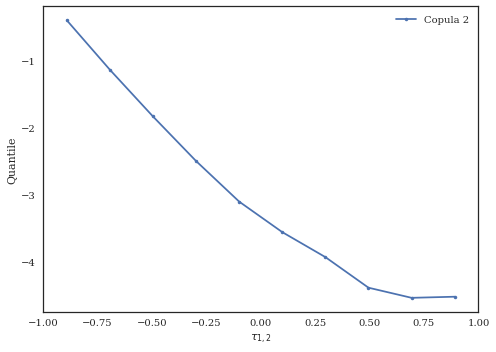

In [14]:
from depimpact.plots import plot_quantities
    
labels = ['Copula %d' % (cop_id) for cop_id in cop_ids]
results = list(grid_results.values())
fig, axes = plot_quantities(results, quantity_name='Quantile', label=labels, plot_scatter=False, n_bins=12)
fig.tight_layout()

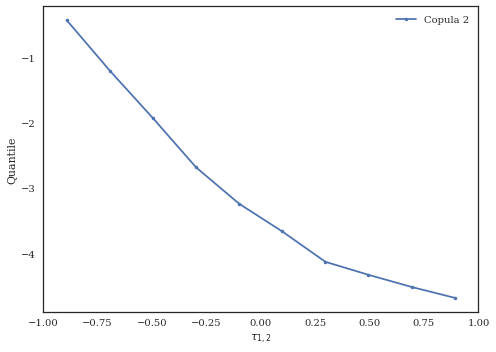

In [12]:
from depimpact.plots import plot_quantities
    
labels = ['Copula %d' % (cop_id) for cop_id in cop_ids]
results = list(grid_results.values())
fig, axes = plot_quantities(results, quantity_name='Quantile', label=labels, plot_scatter=False, n_bins=12)
fig.tight_layout()